In [1]:
import pandas as pd, numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [2]:
train = pd.read_csv('D:/PGDBA/Competitions/ISI/Alien/train.csv')
test = pd.read_csv('D:/PGDBA/Competitions/ISI/Alien//test.csv')

In [6]:
train.head()

,Type,Message,Target
0,Friendly,"Es ilbcx jinslo zsclb, mnyrk.. Opycxyfxa slxk ...",0
1,Friendly,Iq xyn... Zsqclo wch i slc...,0
2,Friendly,Y til uyk us aynxk vsn... Y m yxnaytk bval uyk...,0
3,Friendly,"Byv S tsl'b bvclq va osau bs iuh, va xcpau yns...",0
4,Hostile,XnaaUuo Lak bvana tynxclo cb'u faal 3 waaq'u l...,1


In [7]:
train['Target'] = [0 if x == 'Friendly' else 1 for x in train['Type']]
test['Target'] = [0 if x == 'Friendly' else 1 for x in test['Type']]

In [8]:
train.head()

,Type,Message,Target
0,Friendly,"Es ilbcx jinslo zsclb, mnyrk.. Opycxyfxa slxk ...",0
1,Friendly,Iq xyn... Zsqclo wch i slc...,0
2,Friendly,Y til uyk us aynxk vsn... Y m yxnaytk bval uyk...,0
3,Friendly,"Byv S tsl'b bvclq va osau bs iuh, va xcpau yns...",0
4,Hostile,XnaaUuo Lak bvana tynxclo cb'u faal 3 waaq'u l...,1


In [10]:
lens = train.Message.str.len()
lens.mean(), lens.std(), lens.max()

(80.62361178174795, 60.29910997513194, 910)

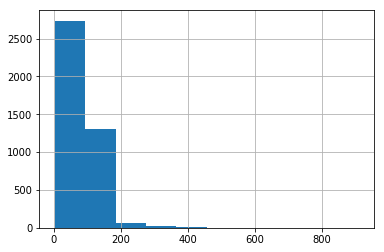

In [12]:
lens.hist()

In [13]:
lens.min()

2

In [16]:
train['len'] = lens
train[train['len']== 2]

,Type,Message,Target,len
1434,Friendly,Iq,0,2
2241,Friendly,Iq,0,2
3985,Friendly,Iq,0,2


In [17]:
lens = test.Message.str.len()
test['len'] = lens

In [18]:
import re, string

In [19]:
len_special = np.array([len(x) - len(re.sub('[^A-Za-z0-9\s]', '', x)) for x in train['Message']])
train['len_special'] = len_special

In [20]:
train.head()

,Type,Message,Target,len,len_special
0,Friendly,"Es ilbcx jinslo zsclb, mnyrk.. Opycxyfxa slxk ...",0,111,9
1,Friendly,Iq xyn... Zsqclo wch i slc...,0,29,6
2,Friendly,Y til uyk us aynxk vsn... Y m yxnaytk bval uyk...,0,49,6
3,Friendly,"Byv S tsl'b bvclq va osau bs iuh, va xcpau yns...",0,61,2
4,Hostile,XnaaUuo Lak bvana tynxclo cb'u faal 3 waaq'u l...,1,148,10


In [21]:
len_special_ts = np.array([len(x) - len(re.sub('[^A-Za-z0-9\s]', '', x)) for x in test['Message']])
test['len_special'] = len_special_ts

In [22]:
test.head()

,Type,Message,Target,len,len_special
0,?,Xnaa albnk cl 2 y wqxk msez bs wcl XO Ciz hcly...,1,155,6
1,?,Ou zan ksin nagiaub 'Uaxxa Uaxxa (Ini Ucllyecl...,1,160,6
2,?,MSBBQD!! Ou y pyxiat labwsnq miubsean ksi vypa...,1,158,8
3,?,Xcla ch bvybåÕu bva wyk i haax. RvybåÕu bva wy...,1,58,5
4,?,Ziub hsnmat ekuaxh bs ayb y uxcma. S'e nayxxk ...,1,144,7


In [23]:
def count_regexp_occ(regexp="", text=None):
    #"Simple way to get the number of occurence of a regex”””
    return len(re.findall(regexp, text))

print(">> Generating Numerical Features For Text")
def numerical_features(df):

    df['char_count'] = df['Message'].apply(len)
    df['count_sent']=df["Message"].apply(lambda x: len(re.findall("\n",str(x)))+1)
    df['num_words'] = df['Message'].apply(lambda comment: len(comment.split()))
    df['capitals'] = df['Message'].apply(lambda comment: sum(1 for c in comment if c.isupper()))

    df['caps_vs_length'] = df.apply(lambda row: float(row['capitals'])/float(row['char_count']),axis=1)
    df['num_exclamation_marks'] = df['Message'].apply(lambda comment: comment.count('!'))

    df['num_question_marks'] = df['Message'].apply(lambda comment: comment.count('?'))

    df['num_punctuation'] = df['Message'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))


#    df['num_stopwords'] = df['Message'].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))
    df['num_symbols'] = df['Message'].apply(lambda comment: sum(comment.count(w) for w in '@#^*&$%'))

    df['mean_word_len'] = df['Message'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

    df['num_unique_words'] = df['Message'].apply(lambda comment: len(set(w for w in comment.split())))

    df['words_vs_unique'] = df['num_unique_words'] / df['num_words']

    df['num_pos_smilies'] = df['Message'].apply(lambda comment: sum(comment.count(w) for w in (':-)', ':)', ';-)', ';)')))
    df['num_neg_smilies'] = df['Message'].apply(lambda comment: sum(comment.count(w) for w in (':-(', ':(', ';-(', ';(')))

    # Count number of \n
    df['ant_slash_n'] = df['Message'].apply(lambda x: count_regexp_occ(r"\n", x))

    # Check for time stamp
    df['has_timestamp'] = df['Message'].apply(lambda x: count_regexp_occ(r'\d{2}|:\d{2}', x))

    # Check for http links
    df['has_http'] = df['Message'].apply(lambda x: count_regexp_occ(r'http[s]{0,1}://\S+', x))

    return

>> Generating Numerical Features For Text


In [24]:
numerical_features(train)

In [25]:
numerical_features(test)

In [26]:
re_tok = re.compile(f'([{string.punctuation}“”¨«»®´·º½¾¿¡§£₤‘’])')

def tokenize(s): 
    return re_tok.sub(r' \1 ', s).split()

In [27]:
tr_msg = [str(x).lower() for x in train['Message']]
ts_msg = [str(x).lower() for x in test['Message']]
msg = list(tr_msg) + list(ts_msg)

In [28]:
print(len(msg), len(train) + len(test))

5522 5522


In [29]:
msg[1]

'iq xyn... zsqclo wch i slc...'

In [30]:
n = train.shape[0]
vec = TfidfVectorizer(ngram_range=(1,4), tokenizer=tokenize,
               min_df=3, max_df=0.9, strip_accents='unicode', use_idf=1, max_features=4800,
               smooth_idf=1, sublinear_tf=1 )
doc = vec.fit_transform(msg)
trn_term_doc = vec.transform(tr_msg)
test_term_doc = vec.transform(ts_msg)

In [32]:
trn_term_doc[0]

<1x4800 sparse matrix of type '<class 'numpy.float64'>'
	with 21 stored elements in Compressed Sparse Row format>

In [33]:
def pr(y_i, y):
    p = x[y==y_i].sum(0)
    return (p+1) / ((y==y_i).sum()+1)

In [34]:
x = trn_term_doc
test_x = test_term_doc

In [35]:
x, test_x

(<4142x4800 sparse matrix of type '<class 'numpy.float64'>'
 	with 98643 stored elements in Compressed Sparse Row format>,
 <1380x4800 sparse matrix of type '<class 'numpy.float64'>'
 	with 32277 stored elements in Compressed Sparse Row format>)

In [36]:
def get_mdl(y):
    y = y.values
    r = np.log(pr(1,y) / pr(0,y))
    m = LogisticRegression(C=1, dual=True)
    x_nb = x.multiply(r)
    return m.fit(x_nb, y), r

In [37]:
label_cols = ['Target']

In [38]:
preds = np.zeros((len(test), len(label_cols)))

for i, j in enumerate(label_cols):
    print('fit', j)
    m,r = get_mdl(train[j])
    preds[:,i] = m.predict_proba(test_x.multiply(r))[:,1]

fit Target


C:\Users\Bhushan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [290]:
preds_ = np.concatenate(preds).ravel()

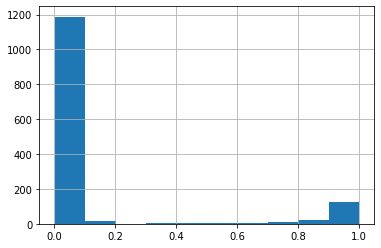

In [291]:
pd.Series(preds_).hist()

In [292]:
sub = test[['Type', 'Message']]

In [293]:
out = []
sub['Type'] = ['Friendly' if x <= 0.2 else 'Hostile' for x in preds_]
sub.to_csv('submission_final_' + "{0:.3f}".format(0.3) + '.csv', index=False)

D:\New folder\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [295]:
len(preds_[preds_ >=0.2])

175

In [64]:
train[train['Target'] == 1]

,Type,Message,Target,len,len_special,char_count,count_sent,num_words,capitals,caps_vs_length,...,num_punctuation,num_symbols,mean_word_len,num_unique_words,words_vs_unique,num_pos_smilies,num_neg_smilies,ant_slash_n,has_timestamp,has_http
4,Hostile,XnaaUuo Lak bvana tynxclo cb'u faal 3 waaq'u l...,1,148,10,148,1,32,7,0.047297,...,8,0,3.656250,31,0.968750,0,0,0,1,0
6,Hostile,Lyt ksin esfcxa 11 eslbvu sn esna? Y D albcbxa...,1,154,2,154,1,29,14,0.090909,...,2,0,4.344828,27,0.931034,0,0,0,6,0
8,Hostile,"KST mvylmau bs wcl COKL! Xnse 100 bs 20,000 zs...",1,136,8,136,1,26,17,0.125000,...,8,0,4.269231,24,0.923077,0,0,0,8,0
9,Hostile,YDEQBR! Asi vypa wsl y 1 waaq XDQQ eaefanuvcz ...,1,156,10,156,1,26,40,0.256410,...,8,1,5.038462,26,1.000000,0,0,0,7,0
12,Hostile,"TTTUsfcxaUspcaCxif: Rs iua ksin mnatcb, mxcmq ...",1,149,11,149,1,19,23,0.154362,...,11,0,6.894737,17,0.894737,0,0,0,0,0
15,Hostile,Qloxylt p Uymatslcy - tslb ecuu bva osyxu/baye...,1,156,10,156,1,24,33,0.211538,...,8,0,5.541667,22,0.916667,0,0,0,9,0
28,Hostile,Rvylqu hsn ksin uifumnczbcsl bs Dclobsla YG ks...,1,159,4,159,1,29,13,0.081761,...,2,0,4.517241,24,0.827586,0,0,0,0,0
45,Hostile,KUK. ym Kzbp: Rva Baw Zanuak Japcxu ylt bva Ja...,1,120,5,120,1,22,24,0.200000,...,5,0,4.500000,22,1.000000,0,0,0,0,0
53,Hostile,"Ou y pyxiat miubsean, S ye zxayuat bs ytpcua k...",1,153,5,153,1,28,6,0.039216,...,3,0,4.500000,26,0.928571,0,0,0,7,0
55,Hostile,Ynoalb YD ywyntat y msezxcealbynk bncz bs Qins...,1,161,14,161,1,22,24,0.149068,...,10,2,6.363636,21,0.954545,0,0,0,8,0


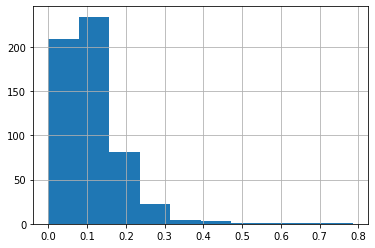

In [70]:
train[train['Target'] == 1]['caps_vs_length'].hist()

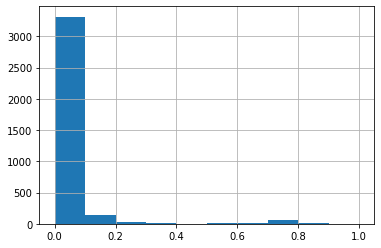

In [71]:
train[train['Target'] == 0]['caps_vs_length'].hist()

In [105]:
train[(train['caps_vs_length']> 0.2) & (train['words_vs_unique']> 0.9) & (train['num_exclamation_marks']>0) & (train['num_symbols']>0)]

,Type,Message,Target,len,len_special,char_count,count_sent,num_words,capitals,caps_vs_length,...,num_punctuation,num_symbols,mean_word_len,num_unique_words,words_vs_unique,num_pos_smilies,num_neg_smilies,ant_slash_n,has_timestamp,has_http
9,Hostile,YDEQBR! Asi vypa wsl y 1 waaq XDQQ eaefanuvcz ...,1,156,10,156,1,26,40,0.256410,...,8,1,5.038462,26,1.000000,0,0,0,7,0
203,Friendly,UA BI. SB NYRIB 0125698789 DSBE UQ SX YD ODIYB...,0,51,3,51,1,11,28,0.549020,...,3,1,3.727273,11,1.000000,0,0,0,5,0
560,Hostile,Lc. Ciubsean Nskyxbk Ihhan:Rva BQM Bsqcy6650 U...,1,149,11,149,1,25,38,0.255034,...,9,2,5.000000,25,1.000000,0,0,0,6,0
619,Friendly,\VII VOVQ! Y QBZIASB AIYDZIV? Y KQQUQJ 2 V EQR...,0,129,12,129,1,23,94,0.728682,...,10,1,4.652174,22,0.956522,0,0,0,0,0
663,Friendly,Ryxq Mcbv Asinuaxh Obxayub Ilma Sl O Jyk...!!!...,0,139,19,139,1,21,34,0.244604,...,19,3,5.619048,20,0.952381,0,0,0,0,0
1167,Hostile,KUK OYCRSIB - O VDOBJ BQM Bsqcy 7250 cu iz 4 y...,1,149,8,149,1,28,40,0.268456,...,8,1,4.357143,27,0.964286,0,0,0,5,0
1277,Hostile,MIM! Rva Vsku D Vymq. ROGQ RLOR 2007 YG Rsin. ...,1,138,9,138,1,25,34,0.246377,...,9,2,4.560000,24,0.960000,0,0,0,4,0
1313,Hostile,Lc 07734396839 SVL Ciubsean Nskyxbk Ihhan: Rva...,1,143,9,143,1,22,41,0.286713,...,7,2,5.545455,22,1.000000,0,0,0,10,0
1999,Hostile,Enayb BQM Ihhan - JIYVNQ Uclu & JIYVNQ Rdb sl ...,1,160,5,160,1,29,35,0.218750,...,5,2,4.551724,27,0.931034,0,0,0,5,0
2637,Hostile,Ciubsean Nskyxbk Ihhan:Rva BQM Bsqcy6650 Usfcx...,1,145,10,145,1,24,37,0.255172,...,8,2,5.083333,24,1.000000,0,0,0,6,0


In [91]:
test[(test['caps_vs_length']> 0.2) & (test['len']>150) & (test['num_punctuation'] >10)]

,Type,Message,Target,len,len_special,char_count,count_sent,num_words,capitals,caps_vs_length,...,num_punctuation,num_symbols,mean_word_len,num_unique_words,words_vs_unique,num_pos_smilies,num_neg_smilies,ant_slash_n,has_timestamp,has_http
721,?,"Kyk bvcu uxswxk.? EIJ,S NIFQ AIY &yez; S BQQJ ...",Friendly,163,15,163,1,29,47,0.288344,...,15,2,4.655172,26,0.896552,0,0,0,0,0


In [137]:
test['Target'] = sub['Type']
test[(test['num_num']>0) & (test['words_vs_unique']> 0.8) & (test['num_exclamation_marks']>0) & (test['num_symbols']>0)]

,Type,Message,Target,len,len_special,char_count,count_sent,num_words,capitals,caps_vs_length,...,num_symbols,mean_word_len,num_unique_words,words_vs_unique,num_pos_smilies,num_neg_smilies,ant_slash_n,has_timestamp,has_http,num_num
108,?,sqeycx: Jayn Jypa bvcu cu ksin hclyx lsbcma bs...,Hostile,161,5,161,1,27,19,0.118012,...,2,5.000000,26,0.962963,0,0,0,10,0,24
144,?,TCNYKSFQ@CNYVKOSKOS 2UIDIM 28/5 KISDQQ KPQCSON...,Hostile,134,8,134,1,17,79,0.589552,...,1,6.941176,17,1.000000,0,0,0,11,0,27
155,?,"Asi vypa wsl ?1,000 myuv sn y ?2,000 zncra! Rs...",Hostile,97,11,97,1,17,12,0.123711,...,1,4.764706,17,1.000000,0,0,0,8,0,24
252,?,1000'u hxcnbclo BIM! Rdb ESDN sn VNIGQ & in BO...,Hostile,104,6,104,1,23,27,0.259615,...,2,3.565217,20,0.869565,0,0,0,5,0,10
287,?,Esb wvyb cb byqau 2 byqa zynb cl bva MDC Dyxxk...,Hostile,159,10,159,1,32,17,0.106918,...,1,4.000000,31,0.968750,0,0,0,3,0,8
462,?,Ynoalb! Pxayua myxx 09061743811 hnse xyltxcla....,Hostile,153,6,153,1,23,19,0.124183,...,2,5.695652,23,1.000000,0,0,0,10,0,24
480,?,MQNN JIBQ! Asin 4* Csuby Jax Ksx Lsxctyk sn å£...,Hostile,162,16,162,1,23,29,0.179012,...,1,6.086957,23,1.000000,0,0,0,11,0,26
490,?,Ynoalb! Pxayua myxx 09061743810 hnse xyltxcla....,Hostile,153,5,153,1,24,19,0.124183,...,3,5.416667,24,1.000000,0,0,0,10,0,24
554,?,YDEQBR!! Asin 4* Csuby Jax Ksx Lsxctyk sn å£50...,Hostile,161,17,161,1,23,27,0.167702,...,1,6.043478,23,1.000000,0,0,0,11,0,26
625,?,Ynoalb! myxx 09066612661 hnse xyltxcla. Asin m...,Hostile,168,9,168,1,27,19,0.113095,...,2,5.259259,27,1.000000,0,0,0,10,0,26


In [119]:
train['num_num'] = train['Message'].apply(lambda comment: sum(comment.count(w) for w in '0123456789'))

In [122]:
test['num_num'] = test['Message'].apply(lambda comment: sum(comment.count(w) for w in '0123456789'))

In [127]:
train[(train['num_num']>5) & (train['caps_vs_length']> 0.2) & (train['words_vs_unique']> 0.9) & (train['num_exclamation_marks']>0) & (train['num_symbols']>0)]

,Type,Message,Target,len,len_special,char_count,count_sent,num_words,capitals,caps_vs_length,...,num_symbols,mean_word_len,num_unique_words,words_vs_unique,num_pos_smilies,num_neg_smilies,ant_slash_n,has_timestamp,has_http,num_num
9,Hostile,YDEQBR! Asi vypa wsl y 1 waaq XDQQ eaefanuvcz ...,1,156,10,156,1,26,40,0.256410,...,1,5.038462,26,1.000000,0,0,0,7,0,20
203,Friendly,UA BI. SB NYRIB 0125698789 DSBE UQ SX YD ODIYB...,0,51,3,51,1,11,28,0.549020,...,1,3.727273,11,1.000000,0,0,0,5,0,10
560,Hostile,Lc. Ciubsean Nskyxbk Ihhan:Rva BQM Bsqcy6650 U...,1,149,11,149,1,25,38,0.255034,...,2,5.000000,25,1.000000,0,0,0,6,0,15
1167,Hostile,KUK OYCRSIB - O VDOBJ BQM Bsqcy 7250 cu iz 4 y...,1,149,8,149,1,28,40,0.268456,...,1,4.357143,27,0.964286,0,0,0,5,0,17
1277,Hostile,MIM! Rva Vsku D Vymq. ROGQ RLOR 2007 YG Rsin. ...,1,138,9,138,1,25,34,0.246377,...,2,4.560000,24,0.960000,0,0,0,4,0,10
1313,Hostile,Lc 07734396839 SVL Ciubsean Nskyxbk Ihhan: Rva...,1,143,9,143,1,22,41,0.286713,...,2,5.545455,22,1.000000,0,0,0,10,0,23
1999,Hostile,Enayb BQM Ihhan - JIYVNQ Uclu & JIYVNQ Rdb sl ...,1,160,5,160,1,29,35,0.218750,...,2,4.551724,27,0.931034,0,0,0,5,0,14
2637,Hostile,Ciubsean Nskyxbk Ihhan:Rva BQM Bsqcy6650 Usfcx...,1,145,10,145,1,24,37,0.255172,...,2,5.083333,24,1.000000,0,0,0,6,0,15
2648,Hostile,Lc 07734396839 SVL Ciubsean Nskyxbk Ihhan: Rva...,1,143,9,143,1,22,41,0.286713,...,2,5.545455,22,1.000000,0,0,0,10,0,23
2944,Hostile,Enayb BQM Ihhan - JIYVNQ Uclu & JIYVNQ Rdb sl ...,1,160,5,160,1,29,35,0.218750,...,2,4.551724,27,0.931034,0,0,0,5,0,14


In [296]:
from sklearn.svm import LinearSVC

In [335]:
clf = LinearSVC(random_state=0, tol=1e-5)
clf.fit(trn_term_doc.todense(), train['Target'])

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=0, tol=1e-05,
          verbose=0)

In [336]:
pr = clf.predict(test_term_doc.todense())

In [337]:
np.sum(pr)

171

In [333]:
sub['Type'] = ['Friendly' if x <= 0.2 else 'Hostile' for x in pr]

D:\New folder\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [338]:
sub.to_csv('submission_final_' + "{0:.3f}".format(0.4) + '.csv', index=False)